(PTDN)=

# 1.6 Polinomios de Taylor y diferenciación numérica

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de la [liga1](https://www.dropbox.com/s/jfrxanjls8kndjp/Diferenciacion_e_Integracion.pdf?dl=0), [liga2](https://www.dropbox.com/s/mmd1uzvwhdwsyiu/4.3.2.Teoria_de_convexidad_Funciones_convexas.pdf?dl=0) e inicio de [liga3](https://www.dropbox.com/s/ko86cce1olbtsbk/4.3.1.Teoria_de_convexidad_Conjuntos_convexos.pdf?dl=0).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Aprenderá que el método de diferenciación finita es un método inestable numéricamente respecto al redondeo.

* Conocerá las expresiones de los polinomios de Taylor para funciones de varias variables.

* Tendrá en su lista de programas del lenguaje *R* implementaciones para aproximar al gradiente y a la Hessiana de una función con los métodos de diferenciación finita.

```

## Problema: ¿Cómo aproximar una función $f$ en un punto $x_1$?

Si $f$ es continuamente diferenciable en $x_0$ y $f^{(1)}, f^{(2)}$ existen y están acotadas en $x_0$ entonces:

$$f(x_1) \approx f(x_0) + f^{(1)}(x_0)(x_1-x_0)$$

y se nombra **aproximación de orden 1**. Ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición de continuidad, diferenciabilidad y propiedades.

```{admonition} Comentarios

* Lo anterior requiere de los valores: $x_0, x_1, f(x_0), f^{(1)}(x_0)$. Esta aproximación tiene un error de **orden** $2$ pues su error es **proporcional** al cuadrado del ancho del intervalo: $h=x_1-x_0$, esto es, si reducimos a la mitad $h$ entonces el error se reduce en una cuarta parte.

* Otra aproximación más simple sería:

$$f(x_1) \approx f(x_0)$$

lo cual sólo requiere del conocimiento de $f(x_0)$ y se nombra aproximación de **orden** $0$, sin embargo esta aproximación tiene un error de **orden** $1$ pues este es proporcional a $h$ , esto es, al reducir a la mitad $h$ se reduce a la mitad el error.

* Los errores anteriores los nombramos errores por **truncamiento**, ver {ref}`Fuentes del error <FuenErr>` y {ref}`Análisis del error <AnErr>` para un recordatorio de tal error. Utilizamos la notación "O grande" $\mathcal{O}(\cdot)$ para escribir lo anterior:

$$f(x)-f(x_0)=\mathcal{O}(h)$$

con la variable $h=x-x_0$. En este caso se representa a un error de orden $1$. Análogamente:

$$f(x)-(f(x_0)+f^{(1)}(x_0)(x-x_0)) = \mathcal{O}(h^2)$$

y se representa un error de orden $2$.

```

```{admonition} Observaciones
:class: tip

* No confundir órdenes de  una aproximación con órdenes de error.

* Otras aproximaciones a una función se pueden realizar con:

    * Interpoladores polinomiales (representación por Vandermonde, Newton, Lagrange).
```

## Aproximación a una función por el teorema de Taylor

En esta sección se presenta el teorema de Taylor, el cual, bajo ciertas hipótesis nos proporciona una expansión de una función alrededor de un punto. Este teorema será utilizado en **diferenciación e integración numérica**. El teorema es el siguiente:

```{admonition} Teorema de Taylor

Sea $f: \mathbb{R} \rightarrow \mathbb{R}$, $f \in \mathcal{C}^n([a,b])$ tal que $f^{(n+1)}$ existe en [a,b]. Si $x_0 \in [a,b]$ entonces $\forall x \in [a,b]$ se tiene: $f(x) = P_n(x) + R_n(x)$ donde: 

$$P_n(x) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)(x-x_0)^k}{k!} \quad (f^{(0)} = f)$$ y

$$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$ 

con $\xi_x$ entre $x_0, x$ y $x_0$ se llama centro. Ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición del conjunto $\mathcal{C}^n([a,b])$.

```

- El residual nos puede ayudar a acotar el error asociado a la aproximación del polinomio del Taylor.
- Con el residual podemos saber cuál es el error máximo que podríamos tener aproximando una función con polinomios de Taylor en un rango específico.

```{admonition} Comentarios

* El teorema de Taylor nos dice que cualquier función suave (función en $\mathcal{C}^n)$ se le puede aproximar por un polinomio en el intervalo $[a,b]$, de hecho $f(x) \approx P_n(x)$.

* El teorema de Taylor es una generalización del [teorema del valor medio para derivadas](https://en.wikipedia.org/wiki/Mean_value_theorem).

* $P_n(x)$ se le llama polinomio de Taylor alrededor de $x_0$ de orden $n$ y $R_n(x)$ es llamado residuo de Taylor alrededor de $x_0$ de orden $n+1$, tiene otras expresiones para representarlo y la que se utiliza en el enunciado anterior es en su forma de Lagrange (ver [liga](https://en.wikipedia.org/wiki/Taylor%27s_theorem) para otras expresiones del residuo).

* $\xi_x$ es un punto entre $x_0, x$ desconocido y está en función de $x$ (por eso se le escribe un subíndice).

* Una forma del teorema de Taylor es escribirlo definiendo a la variable $h=x-x_0$:

$$f(x) = f(x_0+h) = P_n(h) + R_n(h) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)h^k}{k!} + \frac{f^{(n+1)}(\xi_h)h^{n+1}}{(n+1)!}$$

y si $f^{(n+1)}$ es acotada, escribimos: $R_n(h) = \mathcal{O}(h^{n+1})$.
```

### Ejemplo

Graficar la función y los polinomios de Taylor de grados $0,1,2,3$ y $4$ en una sola gráfica para el intervalo $[1,2]$ de la función $\frac{1}{x}$ con centro en $x_0=1.5$. ¿Cuánto es la aproximación de los polinomios en x=1.9?. Calcula el error relativo de tus aproximaciones.

**Solución**

Obtengamos los polinomios de Taylor de orden $n$ con $n \in \{0,1,2, 3\}$ y centro en $x_0=1.5$ para la función $\frac{1}{x}$ en el intervalo $[1,2]$. Los primeros tres polinomios de Taylor son: 

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$

$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) =\frac{2}{3} - \frac{1}{1.5^2}(x-1.5) \quad \text{(lineal)}$$

$$
\begin{eqnarray}
P_2(x) &=& f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} \nonumber \\
&=& \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{1}{x_0^3}(x-x_0)^2 \nonumber \\
&=& \frac{2}{3} -\frac{1}{1.5^2}(x-1.5) + \frac{1}{1.5^3}(x-1.5)^2 \quad \text{(cuadrático)} \nonumber
\end{eqnarray}
$$

In [6]:
library(ggplot2)

In [7]:
options(repr.plot.width=6, repr.plot.height=6) #esta línea sólo se ejecuta para jupyterlab con R

In [8]:
Taylor_approx <- function(x,c,n){
    '
    Taylor approximation for 1/x function. Will return Taylor polynomial of degree n with
    center in c and evaluated in x.
    Args:
        x (double): numeric vector or scalar in which Taylor polynomial will be evaluated. 
        c (double): scalar which represents center of Taylor polynomial of degree n.
        n (integer): scalar which represents degree of Taylor polynomial. 
    Returns:
        sum (double): scalar evaluation of Taylor polynomial of degree n with center c in x.
    '
    length_x <- length(x)
    sum <- vector("double", length_x)
    for(j in 1:length_x){
        mult <- c^(-1)
        sum[j] <- mult
        for(k in 1:n){
            mult <- -1*c^(-1)*(x[j]-c)*mult
            sum[j] <- sum[j] + mult
            }
    }
    sum #accumulated sum
}

In [9]:
x0 <- 1.5
x <- seq(from=1,to=2,by=.005)
n <- c(0,1,2,3,4) #degrees of Taylor polynomials
f <- function(z)1/z
y <- f(x)
y_Taylor_0 <- f(x0)*(vector("double", length(x))+1)
y_Taylor_1 <- Taylor_approx(x,x0,1)
y_Taylor_2 <- Taylor_approx(x,x0,2)
y_Taylor_3 <- Taylor_approx(x,x0,3)
y_Taylor_4 <- Taylor_approx(x,x0,4)

In [10]:
gg <- ggplot()

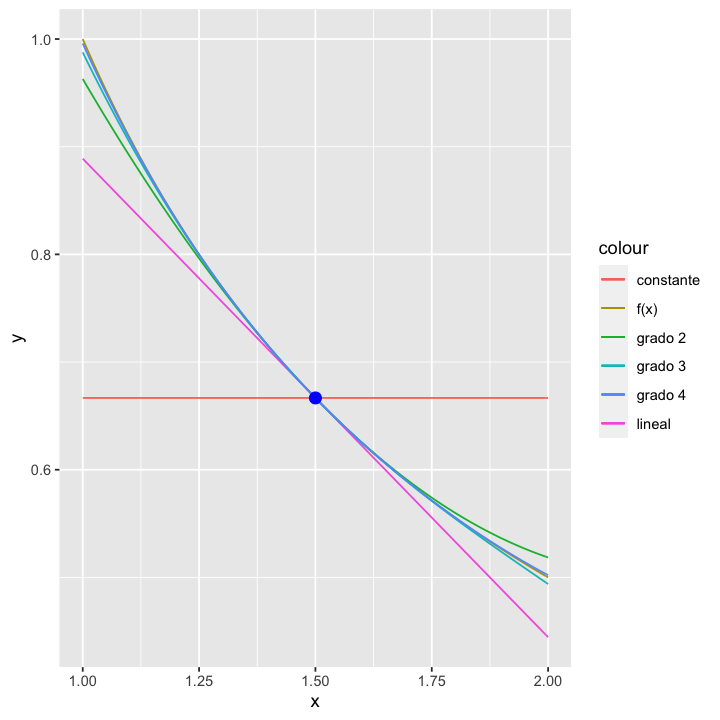

In [11]:
print(gg+
geom_line(aes(x=x,y=y,color='f(x)')) + 
geom_line(aes(x=x,y=y_Taylor_0,color='constante'))+
geom_line(aes(x=x,y=y_Taylor_1,color='lineal')) + 
geom_line(aes(x=x,y=y_Taylor_2,color='grado 2')) + 
geom_line(aes(x=x,y=y_Taylor_3,color='grado 3')) +
geom_line(aes(x=x,y=y_Taylor_4,color='grado 4')) + 
geom_point(aes(x=x0, y=f(x0)), color='blue',size=3))

```{admonition} Observación
:class: tip

Para cualquier aproximación calculada siempre es una muy buena idea reportar el error relativo de la aproximación si tenemos el valor del objetivo. No olvidar esto :)

```

In [12]:
compute_error_point_wise<-function(obj, approx){
    '
    Relative or absolute error between approx and obj in a point wise fashion.
    
    '
    if (abs(obj) > .Machine$double.eps){
        Err<-abs(obj-approx)/abs(obj)
    }else
        Err<-abs(obj-approx)
    Err
}

In [13]:
x_test_point <- 1.9
objective <- f(x_test_point)
#Approximations
p1_approx <- Taylor_approx(x_test_point, x0, 1)
p2_approx <- Taylor_approx(x_test_point, x0, 2)
p3_approx <- Taylor_approx(x_test_point, x0, 3)
p4_approx <- Taylor_approx(x_test_point, x0, 4)

print('error relativo polinomio constante')
print(compute_error_point_wise(objective, 1/x0))
print('error relativo polinomio lineal')
print(compute_error_point_wise(objective, p1_approx))
print('error relativo polinomio grado 2')
print(compute_error_point_wise(objective, p2_approx))
print('error relativo polinomio grado 3')
print(compute_error_point_wise(objective, p3_approx))
print('error relativo polinomio grado 4')
print(compute_error_point_wise(objective, p4_approx))

[1] "error relativo polinomio constante"
[1] 0.2666667
[1] "error relativo polinomio lineal"
[1] 0.07111111
[1] "error relativo polinomio grado 2"
[1] 0.01896296
[1] "error relativo polinomio grado 3"
[1] 0.00505679
[1] "error relativo polinomio grado 4"
[1] 0.001348477


```{admonition} Ejercicio
:class: tip

Aproximar $f(1)$ con polinomios de Taylor de orden $0,1,2,3,4$ si $f(x)=-0.1x^4-0.15x^3-0.5x^2-0.25x+1.2$ con centro en $x0=0$. Calcula los errores relativos de tus aproximaciones. Realiza las gráficas de cada polinomio en el intervalo $[0,1]$ con `ggplot2`. Observa que $R_5(x)$ es cero.
```

## Teorema de Taylor para una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$

Sea $f: \mathbb{R}^n \rightarrow \mathbb{R}$ diferenciable en $\text{dom}f$. Si $x_0, x \in \text{dom}f$ y $x_0+t(x-x_0) \in \text{dom}f, \forall t \in (0,1),$  entonces $\forall x \in \text{dom}f$ se tiene $f(x) = P_0(x) + R_0(x)$ donde:

$$P_0(x) = f(x_0)$$

$$R_0(x) = \nabla f(x_0+t_x(x-x_0))^T(x-x_0)$$

para alguna $t_x \in (0,1)$ y $\nabla f(\cdot)$ gradiente de $f$, ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición del gradiente de una función.

```{admonition} Observación
:class: tip

La aproximación anterior la nombramos **aproximación de orden $0$** para $f$ con centro en $x_0$. Si $\nabla f(\cdot)$ es acotado en $\text{dom}f$ entonces se escribe: $R_0(x)=\mathcal{O}(||x-x_0||)$.
```

Si además $f$ es continuamente diferenciable en $\text{dom}f$(su derivada es continua, ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición de continuidad), $f^{(2)}$ existe en $\text{dom}f$, se tiene $f(x) = P_1(x) + R_1(x)$ donde:

$$P_1(x) = f(x_0) + \nabla f(x_0)^T(x-x_0)$$

$$R_1(x) = \frac{1}{2}(x-x_0)^T \nabla ^2f(x_0+t_x(x-x_0))(x-x_0)$$

para alguna $t_x \in (0,1)$ y $\nabla^2 f(\cdot)$ Hessiana de $f$ (ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición de la matriz Hessiana). 

```{admonition} Observación
:class: tip

La aproximación anterior la nombramos **aproximación de orden $1$** para $f$ con centro en $x_0$. Si $\nabla^2f(\cdot)$ es acotada en $\text{dom}f$ entonces se escribe: $R_1(x) = \mathcal{O}(||x-x_0||^2)$.
```

Si $f^{(2)}$ es continuamente diferenciable y $f^{(3)}$ existe y es acotada en $\text{dom}f$, se tiene $f(x)=P_2(x) + R_2(x)$ donde:

$$P_2(x) = f(x_0) + \nabla f(x_0)^T(x-x_0) + \frac{1}{2}(x-x_0)^T \nabla ^2f(x_0)(x-x_0)$$

```{admonition} Observación
:class: tip

* La aproximación anterior la nombramos **aproximación de orden $2$** para $f$ con centro en $x_0$. Para las suposiciones establecidas se tiene:

$$R_2(x)= \mathcal{O}(||x-x_0||^3).$$

* En este caso $f^{(3)}$ es un tensor.

```

```{admonition} Comentario

Tomando $h=x-x_0$, se reescribe el teorema como sigue, por ejemplo para la aproximación de orden $1$ incluyendo su residuo:

$$f(x) = f(x_0 + h) = \underbrace{f(x_0) + \nabla f(x_0)^Th}_{\textstyle P_1(h)} + \underbrace{\frac{1}{2}h^T \nabla ^2f(x_0+t_xh)h}_{\textstyle R_1(h)}.$$

Si $f^{(2)}$ es acotada en $\text{dom}f$, escribimos: $R_1(h)=\mathcal{O}(||h||^2)$.
```

## Diferenciación numérica por diferencias finitas

- Los polinomios de Taylor nos permiten ter fórmulas que podemos derivar

```{admonition} Comentario

En esta sección se revisan métodos numéricos para aproximar las derivadas. Otros métodos para el cálculo de las derivadas se realizan con el cómputo simbólico o algebraico, ver {ref}` Definición de función, continuidad y derivada <FCD>` para ejemplos.

```

Las fórmulas de aproximación a las derivadas por diferencias finitas pueden obtenerse con los polinomios de Taylor, presentes en el teorema del mismo autor, por ejemplo:

Sea $f \in \mathcal{C}^1([a,b])$ y $f^{(2)}$ existe y está acotada $\forall x \in [a,b]$ entonces, si $x+h \in [a,b]$ con $h>0$ por el teorema de Taylor:

$$f(x+h) = f(x) + f^{(1)}(x)h + f^{(2)}(\xi_{x+h})\frac{h^2}{2}$$ con $\xi_{x+h} \in [x,x+h]$ y al despejar $f^{(1)}(x)$ se tiene: 

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} - f^{(2)}(\xi_{x+h})\frac{h}{2}.$$

y escribimos:

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h).$$

La aproximación $\frac{f(x+h)-f(x)}{h}$ es una fórmula por diferencias hacia delante con error de orden $1$. Gráficamente se tiene:


<img src="https://dl.dropboxusercontent.com/s/r1ypkxkwa9g3pmk/dif_hacia_delante.png?dl=0" heigth="500" width="500">

Con las mismas suposiciones es posible obtener la fórmula para la aproximación por diferencias hacia atrás:

$$f^{(1)}(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{O}(h), h >0.$$


<img src="https://dl.dropboxusercontent.com/s/mxmc8kohurlu9sp/dif_hacia_atras.png?dl=0" heigth="500" width="500">

Considerando $f \in \mathcal{C}^2([a,b]), f^{(3)}$ existe y está acotada $\forall x \in [a,b]$ si $x-h, x+h \in [a,b]$ y $h>0$ entonces:

$$f^{(1)}(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2), h >0.$$

y el cociente $\frac{f(x+h)-f(x-h)}{2h}$ es la aproximación por diferencias centradas con error de orden $2$. Gráficamente:


<img src="https://dl.dropboxusercontent.com/s/jwi0y1t5z58pydz/dif_centradas.png?dl=0" heigth="500" width="500">

```{admonition} Observaciones
:class: tip

* La aproximación por diferencias finitas a la primer derivada de la función tiene un error de orden $\mathcal{O}(h)$ por lo que una elección de $h$ igual a $.1 = 10^{-1}$ generará aproximaciones con alrededor de un dígito correcto.

* La diferenciación numérica por diferencias finitas **no es un proceso con una alta exactitud** pues los problemas del redondeo de la aritmética en la máquina se hacen presentes en el mismo (ver nota {ref}`Sistema de punto flotante <SPF>`). Como ejemplo de esta situación realicemos el siguiente ejemplo.

```

### Ejemplo

Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la primera derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(1)}(1) = -e^{-1}$.

**Definimos la función**

In [14]:
f <- function(x){
     exp(-x)
     }

**Definimos la aproximación numérica por diferencias finitas a la primera derivada**

In [15]:
approx_first_derivative <- function(f, x, h){    
    '
    Numerical differentiation by finite differences. Uses forward point formula
    to approximate first derivative of function.
    Args:
        f (function): function definition.
        x (float): point where first derivative will be approximated
        h (float): step size for forward differences. Tipically less than 1
    Returns:
        res (float): approximation to first_derivative.
    '
    res <- (f(x+h)-f(x))/h
    res
    }

**Puntos donde se evaluará la aproximación:**

In [16]:
x<-1

h<-10^(-1*(1:16))

**Aproximación numérica:**

In [18]:
approx_df <- approx_first_derivative(f,x,h)

**Derivada de la función:**

In [19]:
df<-function(x){
    -exp(-x)
}

In [20]:
obj_df <- df(x)

**Cálculo de errores:**

In [21]:
res_relative_error <- compute_error_point_wise(obj_df, approx_df)

**Gráfica:**

In [22]:
gf <- ggplot()

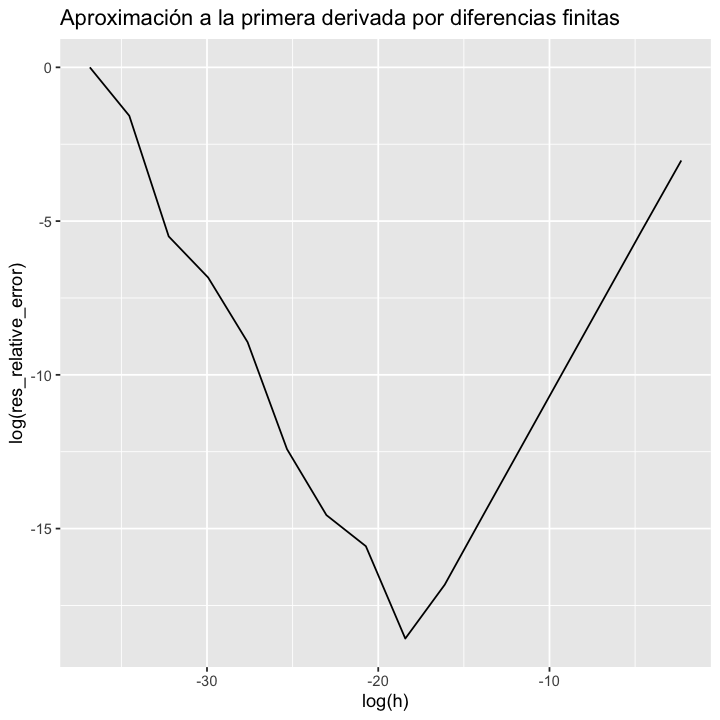

In [23]:
print(gf+
geom_line(aes(x=log(h),y=log(res_relative_error)))+
ggtitle('Aproximación a la primera derivada por diferencias finitas'))

- Las componentes que infuencían la forma del error:
    - Componente asociada al teorema de Taylor (derecha)
    - Componente de error por redondeo (izquierda)
        - La "h" es cada vez más pequeña y se acerca cada vez más a "x"

```{admonition} Ejercicio
:class: tip

Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) con `ggplot2` para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$. Usar:

$$\frac{d^2f(x)}{dx} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2} + \mathcal{O}(h)$$

Encontrar valor(es) de $h$ que minimiza(n) al error absoluto y relativo.
```

```{admonition} Comentario

Aproximaciones a la segunda derivada de una función $f: \mathbb{R} \rightarrow \mathbb{R}$ se pueden obtener con las fórmulas:

* $\frac{d^2f(x)}{dx} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2} + \mathcal{O}(h)$ por diferencias hacia delante.

* $\frac{d^2f(x)}{dx} = \frac{f(x)-2f(x-h)+f(x-2h)}{h^2} + \mathcal{O}(h)$ por diferencias hacia atrás.

* $\frac{d^2f(x)}{dx} = \frac{f(x+h)-2f(x)+f(x-h)}{h^2} + \mathcal{O}(h^2)$ por diferencias centradas.

Estas fórmulas se obtienen con el teorema de Taylor bajo las suposiciones correctas.

```


## Análisis del error por redondeo y truncamiento en aproximación por diferencias finitas hacia delante

El ejemplo anterior muestra (vía una gráfica) que el método numérico de diferenciación numérica no es estable numéricamente respecto al redondeo (ver nota {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>` para definición de estabilidad de un algoritmo) y también se puede corroborar realizando un análisis del error. En esta sección consideramos la aproximación a la primer derivada por diferencias finitas hacia delante:

$$\frac{f(x+h)-f(x)}{h}$$

Suponemos que $\hat{f}(x)$ aproxima a $f(x)$ y por errores de redondeo $\hat{f}(x) = f(x)(1 + \epsilon_{f(x)})$ con $|\epsilon_{f(x)}| \leq \epsilon_{maq}$ error de redondeo al evaluar $f$ en $x$. $\hat{f}(x)$ es la aproximación en un SPFN (ver nota {ref}`Sistema de punto flotante <SPF>`). Además supóngase que $x,x+h,h \in \mathcal{Fl}$ . Entonces en la aproximación a la primer derivada por diferencias  hacia delante:

$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)$ y calculando el error absoluto:


$$
\begin{eqnarray}
\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right ) &=&  \left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right | \nonumber \\
&=& \left | \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h) - \left ( \frac{f(x+h)(1+\epsilon_{f(x+h)})-f(x)(1+\epsilon_{f(x)})}{h} \right ) \right | \nonumber \\
&=& \left |\mathcal{O}(h) - \frac{f(x+h)\epsilon_{f(x+h)}-f(x)\epsilon_{f(x)}}{h} \right | \nonumber \\
&\leq& \mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}
\end{eqnarray}
$$

suponiendo en el último paso que $|f(x+h)\epsilon_{f(x+h)} - f(x)\epsilon_{f(x)}| \leq C \epsilon_{maq}$ con $C>0$ constante que acota a la función $f$ en el intervalo $[a,b]$. Obsérvese que $\frac{\hat{f}(x+h)-\hat{f}(x)}{h}$ es la aproximación a la primer derivada por diferencias hacia delante que se obtiene en la computadora, por lo que la cantidad $\left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right |$ es el error absoluto de la aproximación por diferencias hacia delante. 

El error relativo es:

$$\text{ErrRel}\left (\frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right) = \frac{\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right )}{|f^{(1)}(x)|} \leq \frac{\mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}}{|f^{(1)}(x)|} = K_1h + K_2\frac{1}{h}$$

con $K_1, K_2 >0$ constantes.

- Cuando "h" es muy grande el valor que domina es "K_1"
    - La "K_1" se está refiriendo al error por truncamiento
- Cuando "h" es muy chica el valor que domina es "K_2"
    - La "K_2" se refiere al error por redondeo

Entonces la función $g(h) = \mathcal{O}(h) + \mathcal{O}\left (\frac{1}{h} \right)$ acota al error absoluto y al error relativo y se tiene:

* Si $h \rightarrow 0$ la componente $\mathcal{O} \left ( \frac{1}{h} \right )$ domina a la componente $\mathcal{O}(h)$, la cual tiende a $0$.

* Si $h \rightarrow \infty$ la componente $\mathcal{O}(h)$ domina a $\mathcal{O} \left ( \frac{1}{h} \right )$, la cual tiende a $0$.

Por lo anterior, existe un valor de $h$ que minimiza a los errores. Tal valor se observa en las gráficas anteriores y es igual a:

In [20]:
print(h[which.min(res_relative_error)])

[1] 1e-08


```{admonition} Ejercicio
:class: tip

Obtener de forma analítica el valor de $h$ que minimiza la función $g(h)$ anterior. Tip: utilizar criterio de primera y segunda derivada para encontrar mínimo global.
```

### Conclusiones y comentarios


* La componente $\mathcal{O}(h)$ es el error por truncamiento, la cual resulta del teorema de Taylor. El teorema de Taylor nos indica que añadir términos en el polinomio de Taylor si la $x$ a aproximar es cercana al centro, las derivadas de $f$ son acotadas y $h \rightarrow 0$ entonces el error por truncamiento debe tender a $0$. Lo anterior no ocurre en la implementación numérica (corroborado de forma analítica y visual) del método por diferenciación numérica para la primer derivada por la presencia de la componente $\mathcal{O}\left(\frac{1}{h}\right)$ en los errores. Tal componente proviene del error por redondeo.


* Obsérvese que el error relativo máximo es del $100\%$ lo que indica que no se tiene ninguna cifra correcta en la aproximación:

In [21]:
print(max(res_relative_error))

[1] 1

y esto ocurre para un valor de $h$ igual a:

In [22]:
print(h[which.max(res_relative_error)])

[1] 1e-16

```{admonition} Pregunta
:class: tip

¿Por qué se alcanza el máximo error relativo en el valor de $h=10^{-16}$?.
```

* Con lo anterior se tiene que la diferenciación numérica es un método **inestable numéricamente respecto al redondeo**. Ver nota {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>`.

* Un análisis de error similar se utiliza para el método de diferencias finitas por diferencias centradas para aproximar la primera derivada. En este caso el valor de $h$ que minimiza a los errores es del orden $h^* = 10^{-6}$.

## Diferenciación numérica para una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$

Supongamos $f$ es dos veces diferenciable en $\text{intdom}f$. Si $f: \mathbb{R}^n \rightarrow \mathbb{R}$ entonces $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ y $\nabla ^2f: \mathbb{R}^n \rightarrow \mathbb{R}^{n\times n}$ (ver {ref}`Definición de función, continuidad y derivada <FCD>` para definición de derivadas en funciones $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$). Ambas funciones al evaluarse resultan en un vector en $\mathbb{R}^n$ y en una matriz en $\mathbb{R}^{n\times n}$ respectivamente. 

Podemos utilizar las fórmulas de aproximación en diferenciación numérica con diferencias finitas para el caso $f: \mathbb{R} \rightarrow \mathbb{R}$ revisadas anteriormente para aproximar al gradiente y a la Hessiana.

Para el caso del gradiente se tiene por **diferenciación hacia delante**:

$$\nabla f(x) = 
\begin{array}{l}
\left[ \begin{array}{c}
\frac{\partial f(x)}{\partial x_1}\\
\vdots\\
\frac{\partial f(x)}{\partial x_n}
\end{array}
\right] \approx, \nabla \hat{f}(x) =\left[ 
\begin{array}{c} 
\frac{f(x+he_1) - f(x)}{h}\\
\vdots\\
\frac{f(x+he_n) - f(x)}{h}
\end{array}
\right]
\end{array} \in \mathbb{R}^n$$

con $e_j$ $j$-ésimo vector canónico que tiene un número $1$ en la posición $j$ y $0$ en las entradas restantes para $j=1,\dots,n$. Se cumple $||\nabla f(x) - \nabla \hat{f}(x)|| = \mathcal{O}(h)$. Y para el caso de la Hessiana:

$$\nabla^2f(x) = \left[\begin{array}{cccc}
\frac{\partial^2f(x)}{\partial x_1^2} &\frac{\partial^2f(x)}{\partial x_2 \partial x_1}&\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_1}\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_2} &\frac{\partial^2f(x)}{\partial x_2^2} &\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_2}\\
\vdots &\vdots& \ddots&\vdots\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_n} &\frac{\partial^2f(x)}{\partial x_2 \partial x_n}&\dots&\frac{\partial^2f(x)}{\partial x_n^2} \\
\end{array}
\right],
$$


$$
\nabla^2 \hat{f}(x) = \left[\begin{array}{cccc}
\frac{f(x+2he_1)-2f(x+he_1)+f(x)}{h^2} &\frac{f(x+he_1+he_2)-f(x+he_1)-f(x+he_2)+f(x)}{h^2}&\dots&\frac{f(x+he_1+he_n)-f(x+he_1)-f(x+he_n)+f(x)}{h^2}\\
\frac{f(x+he_1+he_2)-f(x+he_2)-f(x+he_1)+f(x)}{h^2}&\frac{f(x+2he_2)-2f(x+he_2)+f(x)}{h^2}  &\dots&\frac{f(x+he_2+he_n)-f(x+he_2)-f(x+he_n)+f(x)}{h^2}\\
\vdots &\vdots& \ddots&\vdots\\
\frac{f(x+he_1+he_n)-f(x+he_n)-f(x+he_1)+f(x)}{h^2}&\frac{f(x+he_2+he_n)-f(x+he_n)-f(x+he_2)+f(x)}{h^2}&\dots&\frac{f(x+2he_n)-2f(x+he_n)+f(x)}{h^2}\\
\end{array}
\right]
$$

Se cumple: $||\nabla^2f(x)-\nabla\hat{f}^2(x)||=\mathcal{O}(h)$.

### Ejemplo

Aproximar $\nabla f(x), \nabla^2f(x)$ con diferencias hacia delante y $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ para $f: \mathbb{R}^4 \rightarrow \mathbb{R}$, dada por $f(x) = (x_1^2-x_2^2)^2+x_1^2+(x_3^2-x_4^2)^2+x_3^2$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. Realizar una gráfica de $\log($Err_rel) vs $\log($h)

Para esta función se tiene:


$$\nabla f(x) = 
\left[ \begin{array}{c}
4x_1(x_1^2-x_2^2) + 2x_1\\
-4x_2(x_1^2-x_2^2)\\
4x_3(x_3^2-x_4^2)+2x_3\\
-4x_4(x_3^2-x_4^2)
\end{array}
\right] ,
$$

$$\nabla^2f(x)=
 \left[\begin{array}{cccc}
12x_1^2-4x_2^2+2 &-8x_1x_2&0&0\\
-8x_1x_2 &-4x_1^2+12x_2^2&0&0\\
0 &0&12x_3^2-4x_4^2+2&-8x_3x_4\\
0&0&-8x_3x_4&-4x_3^2+12x_4^2\\
\end{array}
\right]
$$

**Gradiente de f calculado de forma simbólica**


In [27]:
gf<-function(x){
    c(4*x[1]*(x[1]^2-x[2]^2)+2*x[1],
      -4*x[2]*(x[1]^2-x[2]^2),
      4*x[3]*(x[3]^2-x[4]^2)+2*x[3],
      -4*x[4]*(x[3]^2-x[4]^2))
}

**Punto en el que se evaluará**

In [30]:
x_0<-c(1.5, 1.5, 1.5, 1.5)

In [31]:
print(gf(x_0))

[1] 3 0 3 0


$$\nabla f(x_0) = 
\left[ \begin{array}{c}
3\\
0\\
3\\
0
\end{array}
\right],
$$

**Hessiana de f calculada de forma simbólica**


In [32]:
gf2<-function(x){
    matrix(c(12*x[1]^2-4*x[2]^2+2,-8*x[1]*x[2],0,0,
             -8*x[1]*x[2],-4*x[1]^2+12*x[2]^2,0,0,
             0,0,12*x[3]^2-4*x[4]^2+2,-8*x[3]*x[4],
             0,0,-8*x[3]*x[4],-4*x[3]^2+12*x[4]^2),nrow=4,ncol=4)
}

**Evaluación de la Hessiana**

In [33]:
print(gf2(x_0))

     [,1] [,2] [,3] [,4]
[1,]   20  -18    0    0
[2,]  -18   18    0    0
[3,]    0    0   20  -18
[4,]    0    0  -18   18


$$\nabla^2f(x_0)=
 \left[\begin{array}{cccc}
20 &-18&0&0\\
-18&18&0&0\\
0 &0&20&-18\\
0&0&-18&18\\
\end{array}
\right]
$$

**Definición de función y punto en el que se calculan las aproximaciones**


In [34]:
f <- function(x){
    (x[1]^2-x[2]^2)^2+x[1]^2+(x[3]^2-x[4]^2)^2+x[3]^2
    }
x0 <- rep(1.5,4)


**Lo siguiente calcula el gradiente y la Hessiana de forma numérica con la aproximación por diferencias hacia delante**

In [35]:
inc_index<-function(vec,index,h){
    '
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (double): vector
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (double): vector with vec[index] increased by h.
    '
    vec[index]<-vec[index]+h
    vec
}

In [36]:
gradient_approximation<-function(f,x,h=1e-8){
    '
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.
    '
    n<-length(x)
    gf<-vector("double",n)
    for(i in 1:n){
        gf[i]=(f(inc_index(x,i,h))-f(x))
    }
    gf/h
}

In [37]:
Hessian_approximation<-function(f,x,h=1e-6){
    '
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (double): matrix of numerical approximation to Hessian of f.
    '
    n<-length(x)
    Hf<-matrix(rep(0,n^2),nrow=n,ncol=n)
    f_x<-f(x)
    for(i in 1:n){
        x_inc_in_i<-inc_index(x,i,h)
        f_x_inc_in_i<-f(x_inc_in_i)
        for(j in i:n){
            dif<-f(inc_index(x_inc_in_i,j,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            Hf[i,j]<-dif
            if(j!=i)
                Hf[j,i]<-dif
        }
    }
    Hf/h^2
}

**Conjunto de valores de h para diferencias hacia delante**

In [38]:
h<-10^(-1*(1:16))

**Funciones para cálculo del error:**

$$\text{ErrRel(approx)} = \frac{||\text{approx}-\text{obj}||}{||\text{obj}||}$$

In [39]:
Euclidian_norm<-function(vec){
    'Compute Euclidian norm of vector'
    sqrt(sum(vec*vec))
}

compute_error<-function(obj,approx){
    '
    Relative or absolute error between obj and approx based in Euclidian norm. 
    Approx is a numeric vector.
    '
    if (Euclidian_norm(obj) > .Machine$double.eps){
        Err<-Euclidian_norm(obj-approx)/Euclidian_norm(obj)
    }else
        Err<-Euclidian_norm(obj-approx)
    Err
}

In [40]:
gf_numeric_approximations <- lapply(h,gradient_approximation,f=f,x=x0)
gf2_numeric_approximations <- lapply(h,Hessian_approximation,f=f,x=x0)


rel_err_gf <- sapply(gf_numeric_approximations,compute_error,obj=gf(x_0))

rel_err_gf2 <- sapply(gf2_numeric_approximations,compute_error,obj=gf2(x_0))

In [41]:
gg<-ggplot()

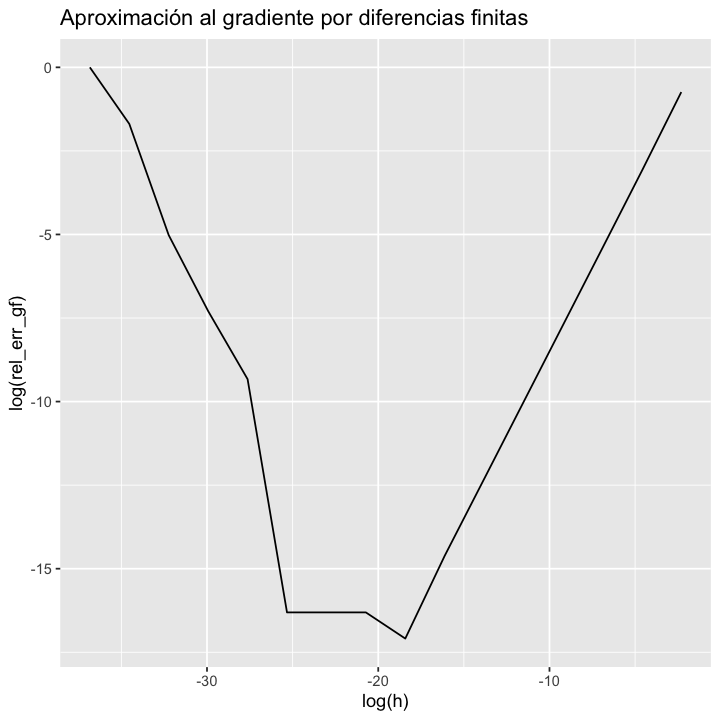

In [42]:
print(gg+
geom_line(aes(x=log(h),y=log(rel_err_gf)))+
ggtitle('Aproximación al gradiente por diferencias finitas'))

In [43]:
print(h[which.min(rel_err_gf)])

[1] 1e-08


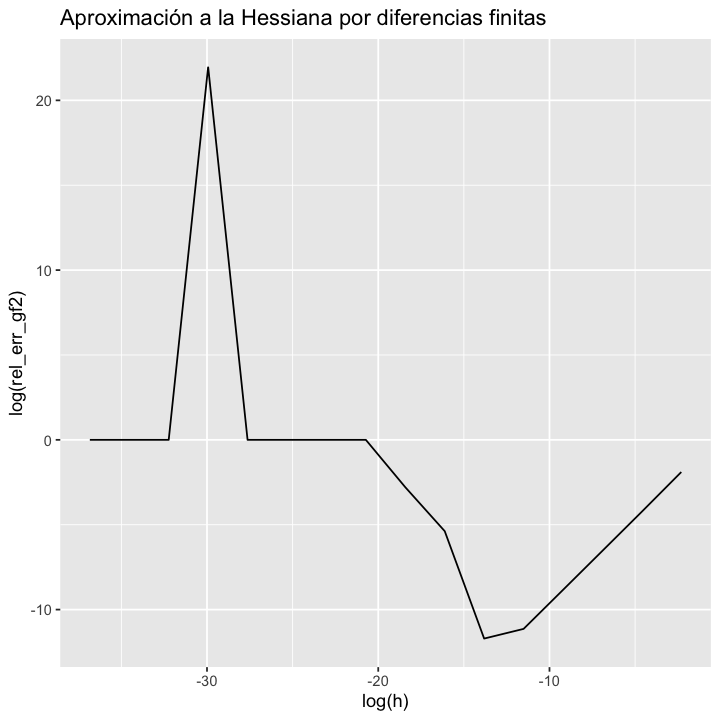

In [44]:
print(gg+
geom_line(aes(x=log(h),y=log(rel_err_gf2)))+
ggtitle('Aproximación a la Hessiana por diferencias finitas'))

In [45]:
print(h[which.min(rel_err_gf2)])

[1] 1e-06


```{admonition} Ejercicio
:class: tip

Aproximar $\nabla f(x), \nabla^2f(x)$ con diferencias hacia delante y $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ para $f: \mathbb{R}^3 \rightarrow \mathbb{R}$, dada por $f(x) = x_1x_2\exp(x_1^2+x_3^2-5)$ en el punto $x_0=(1,3,-2)^T$ Realizar una gráfica de $\log($Err_rel) vs $\log($h).
```

```{admonition} Ejercicios
:class: tip

1. Resuelve los ejercicios y preguntas de la nota.
```

**Referencias**

1. R. L. Burden, J. D. Faires, Numerical Analysis, Brooks/Cole Cengage Learning, 2005.

2. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

3. S. P. Boyd, L. Vandenberghe, Convex Optimization. Cambridge University Press, 2004.

4. Nota {ref}`Sistema de punto flotante <SPF>`.

5. Nota {ref}`Definición de función, continuidad y derivada <FCD>`.

6. Nota {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>`.


---
---